In [1]:
# Beispielcodes

from pybtex.database import parse_string
from pybtex.database import Person, Entry

bibtex_code1 = """
@inproceedings{nenchev-etal-2024-linguistic,
    title = "Linguistic markers of schizophrenia: a case study of {R}obert {W}alser",
    author = "Nenchev, Ivan  and
      Scheffler, Tatjana  and
      de la Fuente, Marie  and
      Stuke, Heiner  and
      Wilck, Benjamin  and
      Just, Sandra Anna  and
      Montag, Christiane",
    editor = "Yates, Andrew  and
      Desmet, Bart  and
      Prud{'}hommeaux, Emily  and
      Zirikly, Ayah  and
      Bedrick, Steven  and
      MacAvaney, Sean  and
      Bar, Kfir  and
      Ireland, Molly  and
      Ophir, Yaakov",
    booktitle = "Proceedings of the 9th Workshop on Computational Linguistics and Clinical Psychology (CLPsych 2024)",
    month = mar,
    year = "2024",
    address = "St. Julians, Malta",
    publisher = "Association for Computational Linguistics",
    url = "https://aclanthology.org/2024.clpsych-1.4",
    pages = "41--60",
}
"""
print(bibtex_code1)

bibtex_code2 = """
@inproceedings{Nenchev_, 
author={I. Nenchev and T. Scheffler and M. de la Fuente and H. Stuke and B. Wilck and S. A. Just and C Montag},
title={2024 (March).".in Yates, A.Desmet, B.Prud},
booktitle={hommeaux, E.Zirikly, A.Bedrick, S.MacAvaney, S.Bar, K.Ireland, M.Ophir, Y.eds.Proceedings of the 9th Workshop on Computational Linguistics and Clinical Psychology (CLPsych 2024).Association for Computational Linguistics},
year={},
editor={Robert Walser},
volume={},
number={},
series={},
pages={},
address={St. Julians, Malta},
month={},
organization={},
publisher={},
note={},
key={Nenchev_},
doi={},
url={https://aclanthology.org/2024.clpsych-1.4},
}
"""

# BibTeX-Code parsen
bib_data = parse_string(bibtex_code1, 'bibtex')
bib_data2 = parse_string(bibtex_code2, 'bibtex')

#Extrahiere Eintragstyp
entry = list(bib_data.entries.values())[0]
print(entry)
print(entry.type)
print(entry.fields)
print(set(entry.fields))
print(dict(entry.persons))


@inproceedings{nenchev-etal-2024-linguistic,
    title = "Linguistic markers of schizophrenia: a case study of {R}obert {W}alser",
    author = "Nenchev, Ivan  and
      Scheffler, Tatjana  and
      de la Fuente, Marie  and
      Stuke, Heiner  and
      Wilck, Benjamin  and
      Just, Sandra Anna  and
      Montag, Christiane",
    editor = "Yates, Andrew  and
      Desmet, Bart  and
      Prud{'}hommeaux, Emily  and
      Zirikly, Ayah  and
      Bedrick, Steven  and
      MacAvaney, Sean  and
      Bar, Kfir  and
      Ireland, Molly  and
      Ophir, Yaakov",
    booktitle = "Proceedings of the 9th Workshop on Computational Linguistics and Clinical Psychology (CLPsych 2024)",
    month = mar,
    year = "2024",
    address = "St. Julians, Malta",
    publisher = "Association for Computational Linguistics",
    url = "https://aclanthology.org/2024.clpsych-1.4",
    pages = "41--60",
}



Entry('inproceedings',
  fields=[
    ('title', 'Linguistic markers of schizophrenia: a case 

In [60]:
# Testweises Parsen mit Pybtex, Extraktion der Felder

from pybtex.database.input import bibtex
from pybtex.database.output import bibtex as bibtex_output

# Beispiel-BibTeX-Eintrag
bibtex_entry = r"""
@book{Brix.1988,
 author = {Brix, Wernher R{\"u}diger and Koplin, Theobalda and T{\"u}rk, Lienard and Montag, Heltrud},
 year = {1988},
 title = {Mutterherz},
 publisher = {{Manchester University Press}},
 address = {Noenoni},
 note = {Border Bride}
}
"""

# BibTeX-Eintrag einlesen
parser = bibtex.Parser()
bib_data = parser.parse_string(bibtex_entry)

# Funktion zum Entfernen leerer Felder definieren
def remove_empty_fields(entry):
    for field in list(entry.fields.keys()):
        if not entry.fields[field]:
            del entry.fields[field]

# Alle Einträge durchlaufen und leere Felder entfernen
for key, entry in bib_data.entries.items():
    remove_empty_fields(entry)

# BibTeX-Eintrag als Zeichenfolge ausgeben
# cleaned_bibtex = bib_data.to_string(bibtex_output.Writer())

# Ausgabe des bereinigten BibTeX-Eintrags
print(bib_data)


BibliographyData(
  entries=OrderedCaseInsensitiveDict([
    ('Brix.1988', Entry('book',
      fields=[
        ('year', '1988'), 
        ('title', 'Mutterherz'), 
        ('publisher', '{Manchester University Press}'), 
        ('address', 'Noenoni'), 
        ('note', 'Border Bride')],
      persons=OrderedCaseInsensitiveDict([('author', [Person('Brix, Wernher R{\\"u}diger'), Person('Koplin, Theobalda'), Person('T{\\"u}rk, Lienard'), Person('Montag, Heltrud')])])))]),

  preamble=[])


In [78]:
# Testing beim Beheben von Formatierungsproblemen
import re

def replace_latex_special_chars(text):
    # Definiere ein Wörterbuch mit den Ersetzungen für die ursprünglichen Bibtex-Codes
    replacements = {
        r'\{\"a\}': 'ä',
        r'\{\"o\}': 'ö',
        r'\{\"u\}': 'ü',
        r'\{\"A\}': 'Ä',
        r'\{\"O\}': 'Ö',
        r'\{\\l\}': 'r',
        r'\{\\ss\}': 'ß',
        r'\{\^e\}': 'ø',
        # Weitere Ersetzungen hinzufügen, falls nötig
    }
    
    # Wende die Ersetzungen an
    for pattern, replacement in replacements.items():
        text = re.sub(pattern, replacement, text)
    
    return text
# Beispieltext
text = 'H{\^e}ndin'

# Konvertiere den Text
converted_text = replace_latex_special_chars(text)
print(converted_text)  # Hündin und Käse sind Öko-Produkte

H{\^e}ndin


<>:23: SyntaxWarning: invalid escape sequence '\^'
<>:23: SyntaxWarning: invalid escape sequence '\^'
C:\Users\David\AppData\Local\Temp\ipykernel_12160\1919568296.py:23: SyntaxWarning: invalid escape sequence '\^'
  text = 'H{\^e}ndin'


In [59]:
# Testing beim Beheben von Formatierungsproblemen mit Rohzeichenketten
from pybtex.database.input import bibtex
from pybtex.database import BibliographyData

# Beispiel BibTeX-Eintrag als Rohzeichenkette
bibtex_entry = r"""
@article{example,
  author = {T{\"u}rk, Lienard},
  title = {Ein Beispielartikel},
  journal = {Beispieljournal},
  year = {2023}
}
"""

# Parser initialisieren und BibTeX-Eintrag einlesen
parser = bibtex.Parser()
bib_data = parser.parse_string(bibtex_entry)

# Beispiel: Drucken des geparsten Eintrags
string = bib_data.entries['example'].persons['author'][0]  # Ausgabe: Person('T{\"u}rk, Lienard')
print(str(string).encode().decode('latex+utf-8').replace('{','').replace('}',''))


Türk, Lienard


In [44]:
# Testing: Extraktion von Namen und Feldern aus dem BC
entry_persons = dict(entry.persons)
entry_fields = dict(entry.fields)

# Extrahiere den Wert eines Attributs
wert = entry_fields.get('series', None)

print(entry_fields)
print(wert)

print(entry_persons)
print(entry_persons.get('author', None))

# Konvertiere die Liste von Person-Objekten in eine Liste von Strings
authors = entry_persons.get('author', None)
author_names = [str(person) for person in authors]

# Konvertiere die Liste von Person-Objekten in eine Liste von Strings mit gekürzten Vornamen
author_names2 = [f"{person.last_names[0]}, {person.first_names[0][0]}" for person in authors]

print(author_names)
print(author_names2)

{'year': '1988', 'title': 'Mutterherz', 'publisher': '{Manchester University Press}', 'address': 'Noenoni', 'note': 'Border Bride'}
None
{'author': [Person('Brix, Wernher R{"u}diger'), Person('Koplin, Theobalda'), Person('T{"u}rk, Lienard'), Person('Montag, Heltrud')]}
T
[Person('Brix, Wernher R{"u}diger'), Person('Koplin, Theobalda'), Person('T{"u}rk, Lienard'), Person('Montag, Heltrud')]
['Brix, Wernher R{"u}diger', 'Koplin, Theobalda', 'T{"u}rk, Lienard', 'Montag, Heltrud']
['Brix, W', 'Koplin, T', 'T{"u}rk, L', 'Montag, H']


In [63]:
# Test des SequenceMatchers (längste gem. Teilfolge)

from difflib import SequenceMatcher

string1 = "barba ra becker"
string2 = "rhabareba ra miller"

match = SequenceMatcher(None, string1, string2).find_longest_match()

print(match)  # -> Match(a=0, b=15, size=9)
print(string1[match.a:match.a + match.size])  # -> apple pie
print(string2[match.b:match.b + match.size])  # -> apple pie

Match(a=3, b=7, size=6)
ba ra 
ba ra 


In [34]:
#Metrik zum Vergleich der Literaturtypen
def literaturtypvergleicher(code1,code2):
    
    # Parsen der Bibtex-Codes
    bib_data1 = parse_string(code1, 'bibtex')
    bib_data2 = parse_string(code2, 'bibtex')

    #Extrahiere Eintragstyp
    entry1 = list(bib_data1.entries.values())[0]
    type1 = entry1.type
    entry2 = list(bib_data2.entries.values())[0]
    type2 = entry2.type

    return type1==type2

print(literaturtypvergleicher(bibtex_code1,bibtex_code2))

True


In [2]:
import pandas as pd

# Pro Literaturtyp die möglichen Attribute (die in Pybtex überhaupt betrachtet werden) definieren
# Seltene Attribute wie Type oder Chapter werden nicht betrachtet
# Note wird ebenfalls nicht betrachtet, da es für das Modell sehr schwer sein könnte, eine Notiz als solche zu erkennen
data = {
    'Literaturtyp': ['article','proceedings','inproceedings','book','incollection','phdthesis'],
    'BetrachteteAttribute': [{'author','title','journal','year','volume','number','pages','month','url','doi'},
               {'title','year','volume','number','pages','month','url','doi','address','editor','series','organization','publisher'},
               {'author','title','year','volume','number','pages','month','url','doi','address','editor','series','organization','booktitle','publisher'},              
               {'author','title','year','volume','number','url','doi','address','editor','series','edition','publisher'},
               {'author','title','year','volume','number','pages','month','url','doi','address','editor','series','booktitle','publisher','edition'},
               {'author','title','year','month','url','doi','address','school'},
             ]
}
df_attribute = pd.DataFrame(data)
display(df_attribute)
display(df_attribute['BetrachteteAttribute'][2])

,Literaturtyp,BetrachteteAttribute
0,article,"{author, number, month, year, journal, doi, pa..."
1,proceedings,"{number, month, series, organization, year, do..."
2,inproceedings,"{author, number, month, series, organization, ..."
3,book,"{author, number, edition, series, year, doi, a..."
4,incollection,"{author, number, month, edition, series, year,..."
5,phdthesis,"{author, month, doi, address, school, title, u..."


{'address',
 'author',
 'booktitle',
 'doi',
 'editor',
 'month',
 'number',
 'organization',
 'pages',
 'publisher',
 'series',
 'title',
 'url',
 'volume',
 'year'}

In [62]:
# Evaluationsmetriken zur Zählung der im Ergebnis fehlenden relevanten Attribute, die im ursprünglichen Bibtex enthalten waren
# sowie der Attribute im Ausgabecode, die nicht im ursprünglichen Code vorkommen.
# Beispiel: Bei book fehlt im Ergebnis Autor und Jahr, dafür ist Editor gegeben, der im ursprünglichen Code nicht vorkam --> 3 Fehler
# code1: ursprünglicher Code
# code2: Ergebnis-Bibtex
def attributvergleicher(code1,code2):
    
    # Parsen der Bibtex-Codes
    bib_data1 = parse_string(code1, 'bibtex')
    bib_data2 = parse_string(code2, 'bibtex')

    #Extrahiere Eintragstyp
    entry1 = list(bib_data1.entries.values())[0]
    type1 = entry1.type
    entry2 = list(bib_data2.entries.values())[0]
    type2 = entry2.type

    # Bestimme die relevanten Attribute für den Literaturtyp des ursprünglichen Bibtex-Codes
    relevante_attribute = df_attribute.loc[df_attribute['Literaturtyp'] == 'book', 'BetrachteteAttribute'].values[0]

    # Bestimme die Listen der Attribute für Eingabe- und Ausgabe-Bibtex
    attribute_set1 = set(entry1.fields).union(set(entry1.persons))
    attribute_set2 = set(entry2.fields).union(set(entry2.persons))

    # Bestimme die relevanten Attribute im Eingabe- und Ausgabe-Bibtex
    relevante_attribute_set1 = attribute_set1.intersection(relevante_attribute)
    relevante_attribute_set2 = attribute_set2.intersection(relevante_attribute)

    # Wie viele relevante Attribute aus der Eingabe tauchen in der Ausgabe nicht mehr auf?
    fehlende_relevante_attribute = relevante_attribute_set1.difference(relevante_attribute_set2)
    anzahl_fehlender_attribute = len(fehlende_relevante_attribute)

    # Wie viele Attribute in der Ausgabe kommen in der Eingabe nicht vor?
    überschüssige_attribute = relevante_attribute_set2.difference(attribute_set1)
    anzahl_überschüssiger_attribute = len(überschüssige_attribute)
    
    return anzahl_fehlender_attribute + anzahl_überschüssiger_attribute

print(attributvergleicher(bibtex_code1,bibtex_code2))

2


In [8]:
# Metrik zur Zählung der im Ergebnis fehlenden relevanten Attribute, die im ursprünglichen Bibtex enthalten waren
# sowie der Attribute im Ausgabecode, die nicht im ursprünglichen Code vorkommen.
# Beispiel: Bei book fehlt im Ergebnis Autor und Jahr, dafür ist Editor gegeben, der im ursprünglichen Code nicht vorkam --> 3 Fehler
# Metrik zum Vergleich der Strings deckungsgleicher Attribute: Dabei wird pro Attribut die längste gemeinsame Teilfolge bestimmt und ins Verhältnis 
# zur Länge des längeren der beiden Attribute gesetzt.
# Beispiel: Titel Eingabe: "Harry Potter", Titel Ausgabe: "Mary Poppins" --> längste gemeinsame Teilfolge "ry Po"
# Länge Eingabe: 12, Länge Ausgabe: 12 --> Verhältnis: 5/12 = 41,7%
# code1: ursprünglicher Code
# code2: Ergebnis-Bibtex

from pybtex.database import parse_string
from pybtex.database import Person, Entry
from difflib import SequenceMatcher
import pandas as pd
import re

def replace_latex_special_chars(text):
    # Definiere ein Wörterbuch mit den Ersetzungen für die ursprünglichen Bibtex-Codes (Formatierungsprobleme)
    replacements = {
        r'\{\"a\}': 'ä',
        r'\{\'a\}': 'á',
        r'\{\`a\}': 'à',
        r'\{\^a\}': 'â', #funktioniert leider nicht
        r'\{\\~a\}': 'ã',
        r'\{\aa\}': 'å',
        r'\{\"e\}': 'ë',
        r'\{\'e\}': 'é',
        r'\{\`e\}': 'è',
        r'\{\^e\}': 'ê', #funktioniert leider nicht
        r'\{\"i\}': 'ï',
        r'\{\'i\}': 'í',
        r'\{\^i\}': 'î',  #funktioniert leider nicht
        r'\{\'\\i\}': 'í', #funktioniert leider nicht
        r'\{\"o\}': 'ö',
        r'\{\'o\}': 'ó',
        r'\{\`o\}': 'ò',
        r'\{\\o\}': 'ø',
        r'\{\"u\}': 'ü',
        r'\{\'u\}': 'ú',
        r'\{\'y\}': 'ý',
        r'\{\"A\}': 'Ä',
        r'\{\'A\}': 'Á',
        r'\{\~A\}': 'Ã',
        r'\{\"O\}': 'Ö',
        r'\{\"U\}': 'Ü',
        r'\{\.z\}': 'ż',
        r'\{\\c\{c\}\}': 'ç',
        r'\{\\c\{s\}\}': 'ş',
        r'\{\'c\}': 'ć',
        r'\{\\l\}': 'ł',
        r'\{\'n\}': 'ń',
        r'\{\\k\{e\}\}': 'ę',
        r'\{\v\{c\}\}': 'č',
        r'\{\v\{e\}\}': 'ě',
        r'\{\v\{g\}\}': 'ǧ',
        r'\{\v\{r\}\}': 'ř',
        r'\{\v\{s\}\}': 'š',
        r'\{\v\{Z\}\}': 'Ž',
        r'\{\\u\{g\}\}': 'ğ',
        r'\{\r\{u\}\}': 'ů',
        r'\{\\ss\}': 'ß',
        r'\{\&\}': '&',
        r'\{\\copyright\}': '©',
        r'\{\_\}': '_',
        r'\{\#\}': '#',
        # Weitere Ersetzungen hinzufügen, falls nötig
    }
    
    # Wende die Ersetzungen an
    for pattern, replacement in replacements.items():
        text = re.sub(pattern, replacement, text)
    
    return text


# Funktion zum Entfernen leerer Felder definieren
def remove_empty_fields(entry):
    for field in list(entry.fields.keys()):
        if not entry.fields[field]:
            del entry.fields[field]


# Eigentlicher Evaluierer
def bibtexvergleicher(code1,code2):
    
    # Konvertiere den Text
    converted_code1 = replace_latex_special_chars(code1)
    #print(converted_code1)  
    bib_data1 = parse_string(converted_code1, 'bibtex')
    bib_data2 = parse_string(code2, 'bibtex')

    # Alle Einträge durchlaufen und leere Felder entfernen
    for key, entry in bib_data1.entries.items():
        remove_empty_fields(entry)
    for key, entry in bib_data2.entries.items():
        remove_empty_fields(entry)

    #Extrahiere Eintragstyp
    entry1 = list(bib_data1.entries.values())[0]
    type1 = entry1.type
    entry2 = list(bib_data2.entries.values())[0]
    type2 = entry2.type

    # Bestimme die relevanten Attribute für den Literaturtyp des ursprünglichen Bibtex-Codes
    relevante_attribute = df_attribute.loc[df_attribute['Literaturtyp'] == type1, 'BetrachteteAttribute'].values[0]

    # Bestimme die Listen der Attribute für Eingabe- und Ausgabe-Bibtex
    attribute_set1 = set(entry1.fields).union(set(entry1.persons))
    attribute_set1 = {element.lower() for element in attribute_set1}
    #print(list(attribute_set1))
    attribute_set2 = set(entry2.fields).union(set(entry2.persons))
    attribute_set2 = {element.lower() for element in attribute_set2}
    #print(list(attribute_set2))

    # Bestimme die relevanten Attribute im Eingabe- und Ausgabe-Bibtex
    relevante_attribute_set1 = attribute_set1.intersection(relevante_attribute)
    #print(list(relevante_attribute_set1))
    relevante_attribute_set2 = attribute_set2.intersection(relevante_attribute)

    # Wie viele relevante Attribute aus der Eingabe tauchen in der Ausgabe nicht mehr auf?
    fehlende_relevante_attribute = relevante_attribute_set1.difference(relevante_attribute_set2)
    anzahl_fehlender_attribute = len(fehlende_relevante_attribute)
    #print(list(fehlende_relevante_attribute))

    # Wie viele Attribute in der Ausgabe kommen in der Eingabe nicht vor?
    überschüssige_attribute = relevante_attribute_set2.difference(attribute_set1)
    anzahl_überschüssiger_attribute = len(überschüssige_attribute)

    # Bestimme die deckungsgleichen Attribute im Eingabe- und Ausgabe-Bibtex
    gleiche_attribute = attribute_set1.intersection(attribute_set2)
    #print(list(gleiche_attribute))

    # Konvertiere Entry zu einem Dictionary
    # Neues Dictionary mit Kleinbuchstaben-Schlüsseln erstellen, da einige Testdaten Keys in Großschreibung haben
    entry1_persons = dict(entry1.persons)
    entry1_persons = {key.lower(): value for key, value in entry1_persons.items()}
    entry1_fields = dict(entry1.fields)
    entry1_fields = {key.lower(): value for key, value in entry1_fields.items()}
    entry2_persons = dict(entry2.persons)
    entry2_persons = {key.lower(): value for key, value in entry2_persons.items()}
    entry2_fields = dict(entry2.fields)
    entry2_fields = {key.lower(): value for key, value in entry2_fields.items()}
    
    # Vergleich der Autoren: Es werden nur Nachnamen und die ersten Buchstaben der Vornamen abgeglichen
    if 'author' in gleiche_attribute:
        
        # Konvertiere die Liste von Person-Objekten in eine Menge von Strings mit gekürzten Vornamen
        authors1 = entry1_persons.get('author', None)
        #print(list(authors1))
        author_names1 = set(f"{person.last_names[0] if person.last_names else ''}, {person.first_names[0][0] if person.first_names else ''}" for person in authors1)
        #for person in authors1:
        #    print(str(person))
        
        authors2 = entry2_persons.get('author', None)
        author_names2 = set(f"{person.last_names[0]}, {person.first_names[0][0] if person.first_names else ''}" for person in authors2)
        #for person in authors2:
        #    print(str(person))

        # Bestimmung der Unterschieds in der Anzahl der Autoren
        differenz_author = abs(len(author_names1)-len(author_names2))

        # Bestimmung des Anteils der richtig gefundenen Autoren aus dem Eingabe-Bibtex
        korrekte_autoren = author_names1.intersection(author_names2)
        #print(korrekte_autoren)
        anteil_korrekter_autoren = len(korrekte_autoren)/len(author_names1)

        # Vergleich der übrigen Einträge in beiden Mengen: Vergleich der Nachnamen
        übrige_autoren1 = author_names1.difference(korrekte_autoren)
        übrige_autoren2 = author_names2.difference(korrekte_autoren)
        
        # Neue Menge für die Nachnamen
        last_name_set1 = {name.split(',')[0] for name in übrige_autoren1}
        #print(list(last_name_set1))
        last_name_set2 = {name.split(',')[0] for name in übrige_autoren2}
        anteil_gleicher_nachnamen = len(last_name_set1.intersection(last_name_set2))/len(author_names1)

        # Anteil überhaupt nicht korrekt erkannter Autoren
        rest = 1-anteil_korrekter_autoren-anteil_gleicher_nachnamen

    elif 'author' in attribute_set1: 
        # Konvertiere die Liste von Person-Objekten in eine Menge von Strings mit gekürzten Vornamen
        authors1 = entry1_persons.get('author', None)
        author_names1 = set(f"{person.last_names[0]}, {person.first_names[0][0] if person.first_names else ''}" for person in authors1)
        
        (differenz_author,anteil_korrekter_autoren,anteil_gleicher_nachnamen,rest) = (len(author_names1),0,0,1)
        
    elif 'author' in attribute_set2: 
        authors2 = entry2_persons.get('author', None)
        author_names2 = set(f"{person.last_names[0]}, {person.first_names[0][0] if person.first_names else ''}" for person in authors2)
        (differenz_author,anteil_korrekter_autoren,anteil_gleicher_nachnamen,rest) = (len(author_names2),0,0,1)

    else: 
        (differenz_author,anteil_korrekter_autoren,anteil_gleicher_nachnamen,rest) = (0,1,0,0)

    
    # Vergleich der Editoren: Es werden nur Nachnamen und die ersten Buchstaben der Vornamen abgeglichen
    if 'editor' in gleiche_attribute:
        
        # Konvertiere die Liste von Person-Objekten in eine Menge von Strings mit gekürzten Vornamen
        editors1 = entry1_persons.get('editor', None)
        editor_names1 = set(f"{person.last_names[0]}, {person.first_names[0][0] if person.first_names else ''}" for person in editors1)
        editors2 = entry2_persons.get('editor', None)
        editor_names2 = set(f"{person.last_names[0]}, {person.first_names[0][0] if person.first_names else ''}" for person in editors2)

        # Bestimmung der Unterschieds in der Anzahl der Editoren
        differenz_editor = abs(len(editor_names1)-len(editor_names2))

        # Bestimmung des Anteils der richtig gefundenen Editoren aus dem Eingabe-Bibtex
        korrekte_editoren = editor_names1.intersection(editor_names2)
        anteil_korrekter_editoren = len(korrekte_editoren)/len(editor_names1)

        # Vergleich der übrigen Einträge in beiden Mengen: Vergleich der Nachnamen
        übrige_editoren1 = editor_names1.difference(korrekte_editoren)
        übrige_editoren2 = editor_names2.difference(korrekte_editoren)
        # Neue Menge für die Nachnamen
        last_name_editor_set1 = {name.split(',')[0] for name in übrige_editoren1}
        last_name_editor_set2 = {name.split(',')[0] for name in übrige_editoren2}
        anteil_gleicher_nachnamen_editor = len(last_name_editor_set1.intersection(last_name_editor_set2))/len(editor_names1)

        # Anteil überhaupt nicht korrekt erkannter Editoren
        rest_editor = 1-anteil_korrekter_editoren-anteil_gleicher_nachnamen_editor

    elif 'editor' in attribute_set1: 
        # Konvertiere die Liste von Person-Objekten in eine Menge von Strings mit gekürzten Vornamen
        editors1 = entry1_persons.get('editor', None)
        editor_names1 = set(f"{person.last_names[0]}, {person.first_names[0][0] if person.first_names else ''}" for person in editors1)
        
        (differenz_editor,anteil_korrekter_editoren,anteil_gleicher_nachnamen_editor,rest_editor) = (len(editor_names1),0,0,1)
        
    elif 'editor' in attribute_set2:
        editors2 = entry2_persons.get('editor', None)
        editor_names2 = set(f"{person.last_names[0]}, {person.first_names[0][0] if person.first_names else ''}" for person in editors2)
        (differenz_editor,anteil_korrekter_editoren,anteil_gleicher_nachnamen_editor,rest_editor) = (len(editor_names2),0,0,1)

    else: 
        (differenz_editor,anteil_korrekter_editoren,anteil_gleicher_nachnamen_editor,rest_editor) = (0,1,0,0)

    
    # Vergleich der übrigen gemeinsamen Felder durch Abgleich der längsten gemeinsamen Teilfolgen
    SummeGemeinsameTeilfolgen = 0
    SummeMaximaleAttributlängen = 0
    gleiche_attribute_ohne_persons = gleiche_attribute.difference(set(['author','editor']))

    # Initialisieren der Variablen mit NA
    Genauigkeit_title=Genauigkeit_series=Genauigkeit_journal=Genauigkeit_year=Genauigkeit_month=Genauigkeit_volume=Genauigkeit_number=Genauigkeit_pages=Genauigkeit_address=Genauigkeit_booktitle=Genauigkeit_publisher=Genauigkeit_edition=Genauigkeit_school=Genauigkeit_url=Genauigkeit_doi = 'NA'
    
    for attribut in gleiche_attribute_ohne_persons:
        # Extrahiere den Wert eines Attributs
        # In den Testdaten werden gelegentlich geschweifte Klammern genutzt, um Großschreibung anzudeuten
        wert1 = entry1_fields.get(attribut, None).replace('{','').replace('}','').lower()
        wert2 = entry2_fields.get(attribut, None).lower()

        # In den Trainings- und Testdaten gibt es zwei Bindestriche zwischen den Seitenzahlen, im Modellergebnis nur einen
        if attribut == 'pages':      
            wert1 = wert1.replace('--', '–')

        # Bei einem Monat sollen nur die ersten 3 Buchstaben verglichen werden, damit "October" und "oct" gematcht wird
        if attribut == 'month':      
            wert1 = wert1[:3]
            wert2 = wert2[:3]

        # Finde die längste gemeinsame Teilfolge
        match = SequenceMatcher(None, wert1, wert2).find_longest_match()
        längste_teilfolge = match.size
        SummeGemeinsameTeilfolgen = SummeGemeinsameTeilfolgen + längste_teilfolge
        
        # Länge des längeren der beiden Attributwerte
        max_länge = max(len(wert1),len(wert2))
        SummeMaximaleAttributlängen = SummeMaximaleAttributlängen + max_länge

        # Längste gemeinsame Teilfolgen im Detailvergleich für ausgewählte Attribute
        if attribut == 'title':
            Genauigkeit_title = längste_teilfolge/max_länge
        if attribut == 'series':
            Genauigkeit_series = längste_teilfolge/max_länge
        if attribut == 'journal':
            Genauigkeit_journal = längste_teilfolge/max_länge
        if attribut == 'year':
            Genauigkeit_year = längste_teilfolge/max_länge
        if attribut == 'month':
            Genauigkeit_month = längste_teilfolge/max_länge
        if attribut == 'volume':
            Genauigkeit_volume = längste_teilfolge/max_länge
        if attribut == 'number':
            Genauigkeit_number = längste_teilfolge/max_länge
        if attribut == 'pages':
            Genauigkeit_pages = längste_teilfolge/max_länge
        if attribut == 'address':
            Genauigkeit_address = längste_teilfolge/max_länge
        if attribut == 'booktitle':
            Genauigkeit_booktitle = längste_teilfolge/max_länge
        if attribut == 'publisher':
            Genauigkeit_publisher = längste_teilfolge/max_länge
        if attribut == 'edition':
            Genauigkeit_edition = längste_teilfolge/max_länge
        if attribut == 'school':
            Genauigkeit_school = längste_teilfolge/max_länge
        if attribut == 'url':
            Genauigkeit_url = längste_teilfolge/max_länge
        if attribut == 'doi':
            Genauigkeit_doi = längste_teilfolge/max_länge

    if SummeMaximaleAttributlängen > 0:
        # Verhältnisbildung nach Durchlaufen aller Attribute
        Prozentsatz = SummeGemeinsameTeilfolgen/SummeMaximaleAttributlängen
    else: Prozentsatz = 'NA'
    
    result = {
    'Literaturtypvergleich': type1==type2,
    'AnzahlFalscherAttribute': anzahl_fehlender_attribute + anzahl_überschüssiger_attribute,
    'NichtGefundeneRelevanteAttribute': ', '.join(map(str, fehlende_relevante_attribute)),
    'ÜberschüssigeAttribute': ', '.join(map(str, überschüssige_attribute)),
    'AnteilGemeinsamerTeilfolgenFields': Prozentsatz,
    'DifferenzAutoren': differenz_author,
    'AnteilKorrekterAutoren': anteil_korrekter_autoren,
    'AnteilGleicherNachnamen': anteil_gleicher_nachnamen,
    'AnteilÜbrigerAutoren': rest,
    'DifferenzEditoren': differenz_editor,
    'AnteilKorrekterEditoren': anteil_korrekter_editoren,
    'AnteilGleicherNachnamenEditoren': anteil_gleicher_nachnamen_editor,
    'AnteilÜbrigerEditoren': rest_editor,
    'GenauigkeitTitel': Genauigkeit_title,
    'GenauigkeitSeries': Genauigkeit_series,
    'GenauigkeitJournal': Genauigkeit_journal,
    'GenauigkeitYear': Genauigkeit_year,
    'GenauigkeitMonth': Genauigkeit_month,
    'GenauigkeitVolume': Genauigkeit_volume,
    'GenauigkeitNumber': Genauigkeit_number,
    'GenauigkeitPages': Genauigkeit_pages,
    'GenauigkeitAddress': Genauigkeit_address,
    'GenauigkeitBooktitle': Genauigkeit_booktitle,
    'GenauigkeitPublisher': Genauigkeit_publisher,
    'GenauigkeitEdition': Genauigkeit_edition,
    'GenauigkeitSchool': Genauigkeit_school,
    'GenauigkeitUrl': Genauigkeit_url,
    'GenauigkeitDoi': Genauigkeit_doi
    }

    #print(Genauigkeit_year)
    df_result = pd.DataFrame(result, index=[0])
    return df_result
    

display(bibtexvergleicher(bibtex_code1,bibtex_code2))

,Literaturtypvergleich,AnzahlFalscherAttribute,NichtGefundeneRelevanteAttribute,ÜberschüssigeAttribute,AnteilGemeinsamerTeilfolgenFields,DifferenzAutoren,AnteilKorrekterAutoren,AnteilGleicherNachnamen,AnteilÜbrigerAutoren,DifferenzEditoren,...,GenauigkeitVolume,GenauigkeitNumber,GenauigkeitPages,GenauigkeitAddress,GenauigkeitBooktitle,GenauigkeitPublisher,GenauigkeitEdition,GenauigkeitSchool,GenauigkeitUrl,GenauigkeitDoi
0,True,4,"pages, publisher, month, year",,0.468023,0,1.0,0.0,0.0,8,...,NA,NA,NA,1.0,0.452055,NA,NA,NA,1.0,NA


In [149]:
# Einlesen der Testergebnisse und Erweiterung der Tabelle um Evaluationsergebnisse
# Pfad zur CSV-Datei
csv_file_path = 'Trainingsdaten/Testdaten/test_result.csv'

# Einlesen der CSV-Datei in einen Pandas DataFrame mit dem Delimiter |
df = pd.read_csv(csv_file_path, delimiter='|')

# Initialisiere Liste
result_list = []

# Zeile x ausgeben (basierend auf dem Index); diese Zeile macht Probleme
row_index = 3314
row = df.iloc[row_index]
#print(row)

# Zeile x entfernen
rows_to_remove = [314,3314]
df = df.drop(rows_to_remove)

# Zeige alle Zeilen, die mit "Fehler:" beginnen
mask = df['Modellergebnis'].str.startswith('Fehler:')

# Entferne die Zeilen, die mit "Fehler:" beginnen, aus dem ursprünglichen DataFrame
df = df[~mask]

# Indizes neu bestimmen
df = df.reset_index(drop=True)

# Durchlaufe alle Bibtex-Paare
for index, row in df.iterrows():
    #if index == 106:
        #print(index)
        result = bibtexvergleicher(row['BibTeX'], row['Modellergebnis'])
        result_list.append(result)


# Ergebnisliste in ein DataFrame umwandeln
df_result = pd.concat(result_list, ignore_index=True)

# Merge der Dataframes
df_evaluation = pd.concat([df, df_result], axis=1)

# Export der Evaluationsergebnisse
df_evaluation.to_csv('Trainingsdaten/Testdaten/test_evaluation.csv', sep='|', index=False)

display(df_evaluation)

,Referenzstring,Style,Literaturtyp,BibTeX,Modellergebnis,Literaturtypvergleich,AnzahlFalscherAttribute,NichtGefundeneRelevanteAttribute,ÜberschüssigeAttribute,AnteilGemeinsamerTeilfolgenFields,...,GenauigkeitVolume,GenauigkeitNumber,GenauigkeitPages,GenauigkeitAddress,GenauigkeitBooktitle,GenauigkeitPublisher,GenauigkeitEdition,GenauigkeitSchool,GenauigkeitUrl,GenauigkeitDoi
0,Gwenaëlle Bricksey. 2016. On the importance of...,acm,phdthesis,"@phdthesis{Bricksey.2016,\n author = {Bricksey...","@phdthesis{Bricksey_2016, \nauthor={Gwenaëlle ...",True,0,,,0.867647,...,NA,NA,NA,NA,NA,NA,NA,1.0,NA,NA
1,Méline Brigg. 2017. Adaptive time- and process...,acm,phdthesis,"@phdthesis{Brigg.2017,\n author = {Brigg, M{\'...","@incollection{Brigg_2017, \nauthor={Méline Bri...",False,2,school,url,0.303571,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Amélie Brigshaw. 2015. Cross-Model Queries and...,acm,phdthesis,"@phdthesis{Brigshaw.2015,\n author = {Brigshaw...","@phdthesis{Brigshaw_2015, \nauthor={Amélie Bri...",True,1,address,,0.514286,...,NA,NA,NA,NA,NA,NA,NA,1.0,NA,NA
3,Solène Brogden. 2013. SeaFlows - a compliance ...,acm,phdthesis,"@phdthesis{Brogden.2013,\n author = {Brogden, ...","@phdthesis{Brogden_2013, \nauthor={Solène Brog...",True,0,,,0.387931,...,NA,NA,NA,1.0,NA,NA,NA,1.0,NA,NA
4,Naéva Brumfield. 2013. Human urban mobility in...,acm,phdthesis,"@phdthesis{Brumfield.2013,\n author = {Brumfie...","@phdthesis{_2013, \nauthor={},\ntitle={Naéva B...",True,1,author,,0.528926,...,NA,NA,NA,1.0,NA,NA,NA,1.0,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,W. J. Morokoff and R. E. Caflisch. Quasi-Monte...,plain,incollection,"@INCOLLECTION {vMOR97a,\n\tAUTHOR=""W. J. Morok...","@incollection{Morokoff_1998, \nauthor={W. J. M...",True,3,"pages, volume, series",,0.719101,...,NA,NA,NA,1.0,0.479167,1.0,NA,NA,NA,NA
3563,V. B. Melas. Optimal simulation design by bran...,plain,incollection,"@INCOLLECTION {vMEL93a,\n\tAUTHOR=""V. B. Melas...","@incollection{Melas_1993, \nauthor={V. B. Mela...",True,1,pages,,0.941667,...,NA,NA,NA,1.0,0.8,1.0,NA,NA,NA,NA
3564,D. R. McDonald. Overloading parallel servers w...,plain,incollection,"@INCOLLECTION {vMCD96a,\n\tAUTHOR=""D. R. McDon...","@incollection{McDonald_1996, \nauthor={D. R. M...",True,3,"pages, volume, series",,0.735450,...,NA,NA,NA,1.0,0.479167,1.0,NA,NA,NA,NA
3565,W.-L. Loh. On the asymptotic distribution of s...,plain,incollection,"@incollection{vLOH05a,\n AUTHOR = {W.-L. Loh}...","@incollection{Loh_2005, \nauthor={W.-L. Loh},\...",True,2,"pages, volume",,0.648438,...,NA,NA,NA,NA,0.595238,1.0,NA,NA,NA,NA


In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Visualisierung der Zeitmessung
# Einlesen der CSV-Datei in einen Pandas DataFrame mit dem Delimiter |
df_time = pd.read_csv('Trainingsdaten/Testdaten/test_time.csv', delimiter='|')
df_time["Ausführungszeit (s)"] = (df_time["Zeit"]/100).round(decimals=1)


,Referenzstring,Style,Literaturtyp,BibTeX,Modellergebnis,Literaturtypvergleich,AnzahlFalscherAttribute,NichtGefundeneRelevanteAttribute,ÜberschüssigeAttribute,AnteilGemeinsamerTeilfolgenFields,...,GenauigkeitVolume,GenauigkeitNumber,GenauigkeitPages,GenauigkeitAddress,GenauigkeitBooktitle,GenauigkeitPublisher,GenauigkeitEdition,GenauigkeitSchool,GenauigkeitUrl,GenauigkeitDoi
0,Gwenaëlle Bricksey. 2016. On the importance of...,acm,phdthesis,"@phdthesis{Bricksey.2016,\n author = {Bricksey...","@phdthesis{Bricksey_2016, \nauthor={Gwenaëlle ...",True,0,NaN,NaN,0.867647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,Méline Brigg. 2017. Adaptive time- and process...,acm,phdthesis,"@phdthesis{Brigg.2017,\n author = {Brigg, M{\'...","@incollection{Brigg_2017, \nauthor={Méline Bri...",False,2,school,url,0.303571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amélie Brigshaw. 2015. Cross-Model Queries and...,acm,phdthesis,"@phdthesis{Brigshaw.2015,\n author = {Brigshaw...","@phdthesis{Brigshaw_2015, \nauthor={Amélie Bri...",True,1,address,NaN,0.514286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,Solène Brogden. 2013. SeaFlows - a compliance ...,acm,phdthesis,"@phdthesis{Brogden.2013,\n author = {Brogden, ...","@phdthesis{Brogden_2013, \nauthor={Solène Brog...",True,0,NaN,NaN,0.387931,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
4,Naéva Brumfield. 2013. Human urban mobility in...,acm,phdthesis,"@phdthesis{Brumfield.2013,\n author = {Brumfie...","@phdthesis{_2013, \nauthor={},\ntitle={Naéva B...",True,1,author,NaN,0.528926,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN


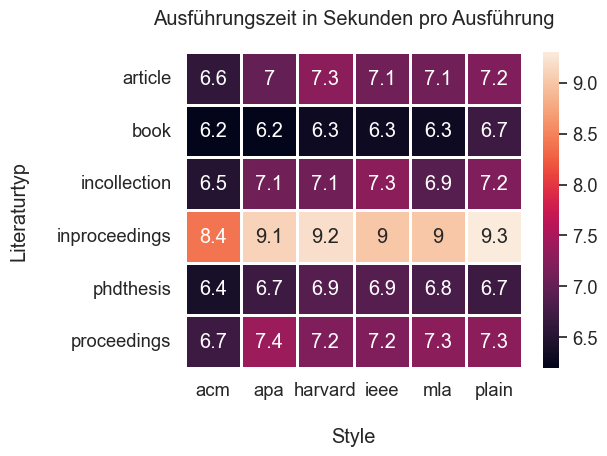

In [7]:
# Heatmap zur Ausführungszeit
glue = df_time.pivot(index="Literaturtyp", columns="Style", values="Ausführungszeit (s)")
sns.set(font_scale=1.2)
heatmap = sns.heatmap(glue, annot = True, linewidth=1)

# Achsenbeschriftungen anpassen
heatmap.set_xlabel('Style', labelpad=20)
heatmap.set_ylabel('Literaturtyp', labelpad=20)

# Titel hinzufügen (optional)
heatmap.set_title('Ausführungszeit in Sekunden pro Ausführung', pad=20)

# Layout anpassen, um abgeschnittene Teile zu vermeiden
plt.tight_layout()
plt.savefig('heatmap_laufzeiten.png')

# Anzeigen der Heatmap
plt.show()

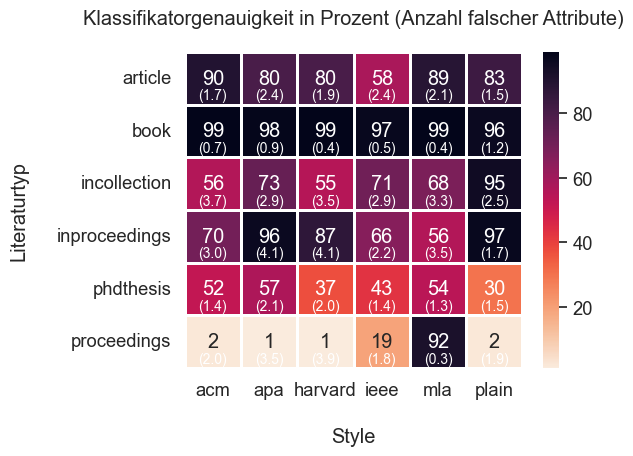

In [181]:
# Erzeugung der HEatmap zur Klassifikatorgenauigkeit

df = pd.read_csv('Trainingsdaten/Testdaten/test_evaluation.csv', delimiter='|')
#display(df_klass.head(5))

# Heatmap zur Klassifikatorgenauigkeit
df_klass = df.filter(['Style', 'Literaturtyp', 'Literaturtypvergleich', 'AnzahlFalscherAttribute']).groupby(['Style', 'Literaturtyp']).agg(
    Klassifikatorgenauigkeit=('Literaturtypvergleich', 'mean'),
    AnzahlFalscherAttribute=('AnzahlFalscherAttribute', 'mean')
).reset_index()

df_klass['Klassifikatorgenauigkeit'] = (df_klass['Klassifikatorgenauigkeit']*100).round().astype(int)
df_klass['AnzahlFalscherAttribute'] = df_klass['AnzahlFalscherAttribute'].round(decimals=1)

#display(df_klass)

glue2 = df_klass.pivot(index="Literaturtyp", columns="Style", values="Klassifikatorgenauigkeit")
sns.set(font_scale=1.2)
heatmap = sns.heatmap(glue2, annot = True, linewidth=1, cmap="rocket_r")

# Daten für die benutzerdefinierten Annotierungen
df_b = df_klass.pivot(index="Literaturtyp", columns="Style", values="AnzahlFalscherAttribute")

# Benutzerdefinierte Annotierungen (Anzahl falscher Attribute)
for i in range(glue2.shape[0]):
    for j in range(glue2.shape[1]):
        text = f'\n({df_b.iloc[i, j]})'
        heatmap.text(j + 0.5, i + 0.67, text, ha='center', va='center', color='white', fontsize=10)

# Achsenbeschriftungen anpassen
heatmap.set_xlabel('Style', labelpad=20)
heatmap.set_ylabel('Literaturtyp', labelpad=20)

# Titel hinzufügen (optional)
heatmap.set_title('Klassifikatorgenauigkeit in Prozent (Anzahl falscher Attribute)', pad=20)

# Layout anpassen, um abgeschnittene Teile zu vermeiden
plt.tight_layout()
plt.savefig('heatmap_klassifikator.png')

# Anzeigen der Heatmap
plt.show()

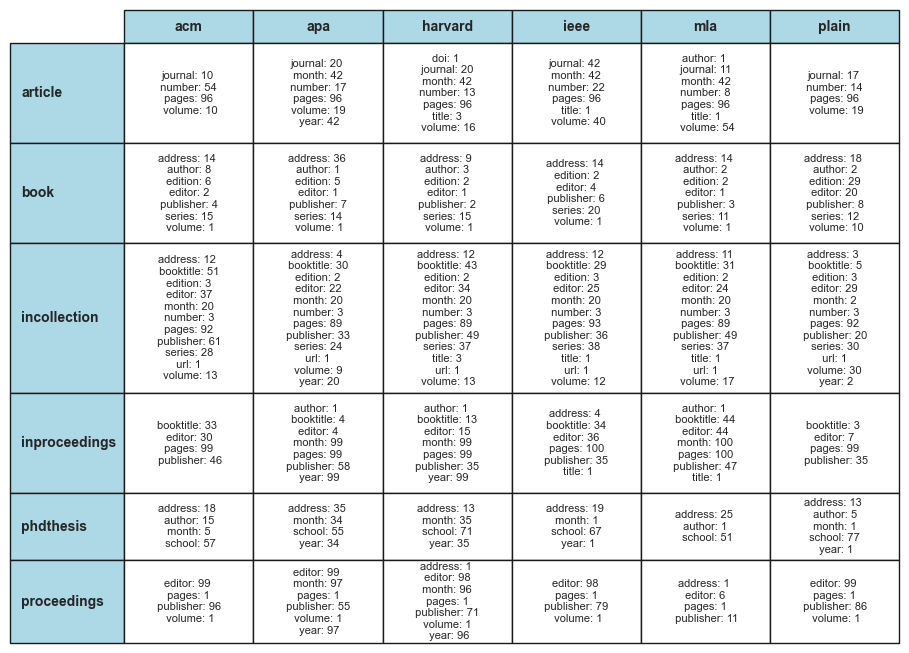

In [239]:
# Tabellarische Darstellerung nicht gefundener Attribute pro Stil und Eintragstyp
df_attr = df.filter(['Style', 'Literaturtyp', 'NichtGefundeneRelevanteAttribute'])

# Aufsplitten der Werte in der Spalte 'NichtGefundeneRelevanteAttribute'
df_split = df_attr['NichtGefundeneRelevanteAttribute'].str.split(', ', expand=True)

# Zusammenführen der aufgesplitteten Werte mit den Spalten Typ und Stil
df_combined = pd.concat([df_attr[['Style', 'Literaturtyp']], df_split], axis=1)
#display(df_combined.head(15))

# Gruppieren nach Style, Literaturtyp und zählen der Werte
grouped = df_combined.melt(id_vars=['Style', 'Literaturtyp'], value_vars=df_split.columns).dropna()
grouped = grouped.groupby(['Style', 'Literaturtyp', 'value']).size().reset_index(name='count')

# Erstellen der Ergebnis-Spalte
grouped['Result'] = grouped.apply(lambda row: f"{row['value']}: {row['count']}", axis=1)

# Pivotieren und Zusammenfügen der Ergebnisse
pivot = grouped.pivot_table(index='Literaturtyp', columns='Style', values='Result', aggfunc=lambda x: ' \n '.join(x)).fillna('')
# Ausgabe des DataFrame
# display(pivot)

# Tabelle plotten
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=pivot.values,
                 rowLabels=pivot.index,
                 colLabels=pivot.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)

# Anpassung der Zellen
for (i, j), cell in table.get_celld().items():
    cell.set_fontsize(8)
    if i == 1:  # Überspringe die Zellen der Achsenbeschriftungen
        cell.set_height(cell.get_height() * 6)
    if i == 2:  # Überspringe die Zellen der Achsenbeschriftungen
        cell.set_height(cell.get_height() * 6)
    if i == 3:  # Überspringe die Zellen der Achsenbeschriftungen
        cell.set_height(cell.get_height() * 9)
    if i == 4:  # Überspringe die Zellen der Achsenbeschriftungen
        cell.set_height(cell.get_height() * 6)
    if i == 5:  # Überspringe die Zellen der Achsenbeschriftungen
        cell.set_height(cell.get_height() * 4)
    if i == 6:  # Überspringe die Zellen der Achsenbeschriftungen
        cell.set_height(cell.get_height() * 5)

for (i, j), cell in table.get_celld().items():
    if j < 0:  
        cell.set_fontsize(10)
        cell.get_text().set_weight('bold')
        cell.set_facecolor('lightblue')
    if i == 0:  
        cell.set_fontsize(10)
        cell.get_text().set_weight('bold')
        cell.set_facecolor('lightblue')
        cell.set_height(cell.get_height() * 2)

plt.savefig('tabelle_attribute.png')
plt.show()

In [10]:
# Aggregation der Evaluationsergebnisse

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df2 = pd.read_csv('Trainingsdaten/Testdaten/test_evaluation.csv', delimiter='|')
#display(df_klass.head(5))

# Extraktion relevanter Spalten
df2 = df2.drop([
    'Literaturtypvergleich',
    'AnzahlFalscherAttribute',
    'NichtGefundeneRelevanteAttribute',
    'ÜberschüssigeAttribute',
    'DifferenzAutoren',
    'DifferenzEditoren'], axis=1)
df_felder = df2.groupby(['Style', 'Literaturtyp']).agg({
    'AnteilGemeinsamerTeilfolgenFields': 'mean',
    'AnteilKorrekterAutoren': 'mean', 
    'AnteilGleicherNachnamen': 'mean', 
    'AnteilÜbrigerAutoren': 'mean',
    'AnteilKorrekterEditoren': 'mean',
    'AnteilGleicherNachnamenEditoren': 'mean',
    'AnteilÜbrigerEditoren': 'mean',
    'GenauigkeitTitel': 'mean',
    'GenauigkeitSeries': 'mean',
    'GenauigkeitJournal': 'mean',
    'GenauigkeitYear': 'mean',
    'GenauigkeitMonth': 'mean',
    'GenauigkeitVolume': 'mean',
    'GenauigkeitNumber': 'mean',
    'GenauigkeitPages': 'mean',
    'GenauigkeitAddress': 'mean',
    'GenauigkeitBooktitle': 'mean',
    'GenauigkeitPublisher': 'mean',
    'GenauigkeitEdition': 'mean',
    'GenauigkeitSchool': 'mean',
    'GenauigkeitUrl': 'mean',
    'GenauigkeitDoi': 'mean'}
).round(decimals=3).reset_index()

display(df_felder)

,Style,Literaturtyp,AnteilGemeinsamerTeilfolgenFields,AnteilKorrekterAutoren,AnteilGleicherNachnamen,AnteilÜbrigerAutoren,AnteilKorrekterEditoren,AnteilGleicherNachnamenEditoren,AnteilÜbrigerEditoren,GenauigkeitTitel,...,GenauigkeitVolume,GenauigkeitNumber,GenauigkeitPages,GenauigkeitAddress,GenauigkeitBooktitle,GenauigkeitPublisher,GenauigkeitEdition,GenauigkeitSchool,GenauigkeitUrl,GenauigkeitDoi
0,acm,article,0.894,0.921,0.000,0.079,0.460,0.000,0.540,0.914,...,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,acm,book,0.859,0.830,0.000,0.170,0.890,0.000,0.110,0.793,...,1.000,NaN,NaN,0.959,NaN,0.964,0.333,NaN,NaN,NaN
2,acm,incollection,0.674,0.935,0.000,0.065,0.582,0.000,0.418,0.717,...,0.917,NaN,NaN,0.986,0.149,0.983,NaN,NaN,1.0,1.0
3,acm,inproceedings,0.643,0.900,0.002,0.099,0.649,0.000,0.351,0.548,...,NaN,NaN,NaN,1.000,0.327,1.000,NaN,NaN,1.0,NaN
4,acm,phdthesis,0.583,0.850,0.000,0.150,0.990,0.000,0.010,0.502,...,NaN,NaN,NaN,0.869,NaN,NaN,NaN,0.989,NaN,NaN
5,acm,proceedings,0.474,0.030,0.000,0.970,0.010,0.000,0.990,0.126,...,NaN,NaN,NaN,0.994,NaN,0.667,NaN,NaN,1.0,1.0
6,apa,article,0.675,0.921,0.000,0.079,0.460,0.000,0.540,0.534,...,1.000,1.0,NaN,NaN,NaN,0.548,NaN,NaN,1.0,1.0
7,apa,book,0.830,0.878,0.000,0.122,0.871,0.000,0.129,0.789,...,1.000,NaN,NaN,0.865,NaN,0.947,0.333,NaN,NaN,NaN
8,apa,incollection,0.751,0.941,0.000,0.059,0.726,0.005,0.269,0.765,...,1.000,NaN,NaN,0.925,0.643,0.978,NaN,NaN,1.0,1.0
9,apa,inproceedings,0.513,0.889,0.000,0.111,0.906,0.000,0.094,0.288,...,NaN,NaN,NaN,1.000,0.367,1.000,NaN,NaN,1.0,NaN


In [22]:
# Vorbereitung der gruppierten Balkendiagramme
import matplotlib.pyplot as py

df_filter = df_felder
df_filter["author"] = df_filter['AnteilKorrekterAutoren']+df_filter['AnteilGleicherNachnamen']
df_filter["editor"] = df_filter['AnteilKorrekterEditoren']+df_filter['AnteilGleicherNachnamenEditoren']
dict = {'AnteilGemeinsamerTeilfolgenFields': 'total_fields',
    'GenauigkeitTitel': 'title',
    'GenauigkeitSeries': 'series',
    'GenauigkeitJournal': 'journal',
    'GenauigkeitYear': 'year',
    'GenauigkeitMonth': 'month',
    'GenauigkeitVolume': 'volume',
    'GenauigkeitNumber': 'number',
    'GenauigkeitPages': 'pages',
    'GenauigkeitAddress': 'address',
    'GenauigkeitBooktitle': 'booktitle',
    'GenauigkeitPublisher': 'publisher',
    'GenauigkeitEdition': 'edition',
    'GenauigkeitSchool': 'school',
    'GenauigkeitUrl': 'url',
    'GenauigkeitDoi': 'doi'}
 
df_filter.rename(columns=dict,
          inplace=True)

,Style,total_fields,title,year,month,address,booktitle,publisher,url,author,editor
0,acm,0.643,0.548,1.0,1.0,1.000,0.327,1.0,1.0,0.902,0.649
1,apa,0.513,0.288,NaN,NaN,1.000,0.367,1.0,1.0,0.889,0.906
2,harvard,0.385,0.053,NaN,NaN,1.000,0.102,1.0,1.0,0.889,0.795
3,ieee,0.886,0.757,1.0,1.0,0.910,0.913,1.0,1.0,0.913,0.618
4,mla,0.830,0.705,1.0,NaN,0.651,0.892,1.0,1.0,0.846,0.539
5,plain,0.661,0.545,1.0,1.0,1.000,0.481,1.0,1.0,0.891,0.383


C:\Users\David\AppData\Local\Temp\ipykernel_12004\2121616920.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


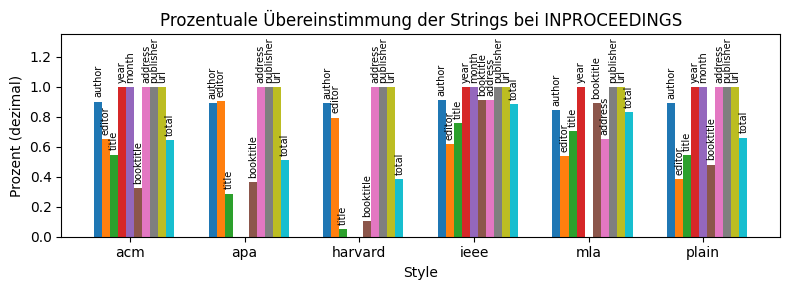

In [33]:
# Einschränkung auf einen Typ und Generierung des gruppierten Balkendiagramms
type = 'inproceedings'
df_filter2 = df_filter.loc[df_filter["Literaturtyp"] == type].reset_index(drop=True)

df_filter2 = df_filter2.drop([
    'Literaturtyp','AnteilKorrekterAutoren', 'AnteilGleicherNachnamen', 'AnteilÜbrigerAutoren',
    'AnteilKorrekterEditoren','AnteilGleicherNachnamenEditoren','AnteilÜbrigerEditoren', 'series', 'journal', 'volume', 'number', 'pages', 'edition',
    'school','doi'], axis=1)

display(df_filter2)

species = tuple(df_filter2['Style'])
penguin_means = {
    'author': tuple(df_filter2['author']),
    'editor': tuple(df_filter2['editor']),
    'title': tuple(df_filter2['title']),
    'year': tuple(df_filter2['year']),
    'month': tuple(df_filter2['month']),
    'booktitle': tuple(df_filter2['booktitle']),
    'address': tuple(df_filter2['address']),
    'publisher': tuple(df_filter2['publisher']),
    'url': tuple(df_filter2['url']),
    'total': tuple(df_filter2['total_fields'])
}

x = np.arange(len(species))  # the label locations
width = 0.07  # the width of the bars
n = len(penguin_means)  # Anzahl der Attribute
total_width = width * n  # Gesamtbreite aller Bars für einen x-Wert
offset_start = -total_width / 2  # Anfangsoffset, um die Bars zu zentrieren

fig, ax = plt.subplots(figsize=(8, 3), layout='constrained')

for i, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = offset_start + 0.14 + i * width
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, labels=[attribute] * len(rects), padding=3, rotation=90, fontsize=7)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prozent (dezimal)')
ax.set_xlabel('Style')
ax.set_title('Prozentuale Übereinstimmung der Strings bei INPROCEEDINGS')
ax.set_xticks(x + width, species)
#ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.35)

# Layout anpassen, um abgeschnittene Teile zu vermeiden
plt.tight_layout()
plt.savefig('inproceedings.png')
plt.show()

,Style,total_fields,title,year,month,volume,address,publisher,url,doi,author,editor
0,acm,0.474,0.126,1.0,0.99,NaN,0.994,0.667,1.0,1.0,0.03,0.010
1,apa,0.560,0.229,1.0,NaN,NaN,0.994,0.984,1.0,1.0,0.01,0.010
2,harvard,0.466,0.105,1.0,NaN,NaN,0.996,0.974,1.0,1.0,0.01,0.010
3,ieee,0.451,0.047,1.0,0.99,NaN,0.996,0.955,1.0,1.0,0.19,0.018
4,mla,0.941,0.893,1.0,0.99,1.0,0.996,0.978,1.0,1.0,1.00,0.864
5,plain,0.453,0.065,1.0,0.99,NaN,0.996,0.944,1.0,1.0,0.20,0.010


C:\Users\David\AppData\Local\Temp\ipykernel_12004\3783430314.py:49: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


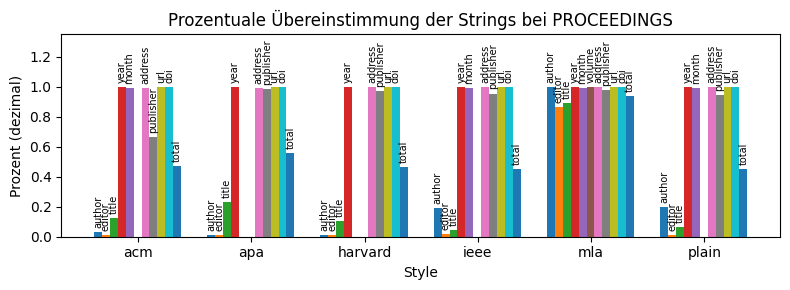

In [38]:
# Einschränkung auf einen Typ und Generierung des gruppierten Balkendiagramms
type = 'proceedings'
df_filter2 = df_filter.loc[df_filter["Literaturtyp"] == type].reset_index(drop=True)

df_filter2 = df_filter2.drop([
    'Literaturtyp','AnteilKorrekterAutoren', 'AnteilGleicherNachnamen', 'AnteilÜbrigerAutoren',
    'AnteilKorrekterEditoren','AnteilGleicherNachnamenEditoren','AnteilÜbrigerEditoren'
    ,'series', 'journal', 'number', 'pages', 'booktitle', 'edition','school'
    ], axis=1)
display(df_filter2)

species = tuple(df_filter2['Style'])
penguin_means = {
    'author': tuple(df_filter2['author']),
    'editor': tuple(df_filter2['editor']),
    'title': tuple(df_filter2['title']),
    'year': tuple(df_filter2['year']),
    'month': tuple(df_filter2['month']),
    'volume': tuple(df_filter2['volume']),
    'address': tuple(df_filter2['address']),
    'publisher': tuple(df_filter2['publisher']),
    'url': tuple(df_filter2['url']),
    'doi': tuple(df_filter2['doi']),
    'total': tuple(df_filter2['total_fields'])
}

x = np.arange(len(species))  # the label locations
width = 0.07  # the width of the bars
n = len(penguin_means)  # Anzahl der Attribute
total_width = width * n  # Gesamtbreite aller Bars für einen x-Wert
offset_start = -total_width / 2  # Anfangsoffset, um die Bars zu zentrieren

fig, ax = plt.subplots(figsize=(8, 3), layout='constrained')

for i, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = offset_start + 0.1 + i * width
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, labels=[attribute] * len(rects), padding=3, rotation=90, fontsize=7)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prozent (dezimal)')
ax.set_xlabel('Style')
ax.set_title('Prozentuale Übereinstimmung der Strings bei PROCEEDINGS')
ax.set_xticks(x + width, species)
#ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.35)

# Layout anpassen, um abgeschnittene Teile zu vermeiden
plt.tight_layout()
plt.savefig('proceedings.png')
plt.show()

,Style,total_fields,title,journal,year,month,volume,number,publisher,url,doi,author,editor
0,acm,0.894,0.914,0.813,1.0,1.0,0.044,NaN,NaN,1.0,1.0,0.921,0.46
1,apa,0.675,0.534,0.589,1.0,NaN,1.000,1.0,0.548,1.0,1.0,0.921,0.46
2,harvard,0.947,0.927,1.000,1.0,NaN,1.000,1.0,0.548,1.0,1.0,0.921,0.45
3,ieee,0.952,0.933,1.000,1.0,NaN,1.000,1.0,0.548,1.0,1.0,0.921,0.46
4,mla,0.938,0.911,0.980,1.0,NaN,1.000,1.0,0.548,1.0,1.0,0.890,0.46
5,plain,0.926,0.896,0.986,1.0,1.0,1.000,1.0,0.548,1.0,1.0,0.921,0.46


C:\Users\David\AppData\Local\Temp\ipykernel_12004\319192292.py:50: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


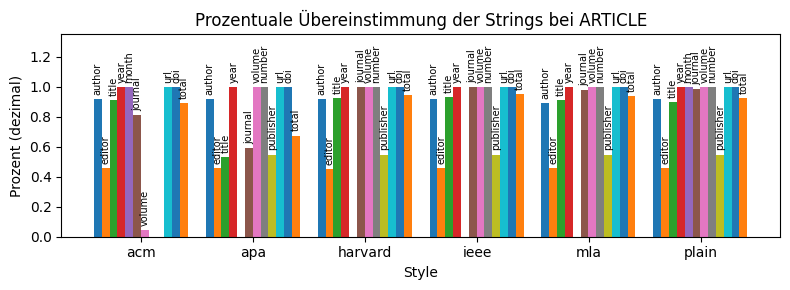

In [42]:
# Einschränkung auf einen Typ und Generierung des gruppierten Balkendiagramms
type = 'article'
df_filter2 = df_filter.loc[df_filter["Literaturtyp"] == type].reset_index(drop=True)

df_filter2 = df_filter2.drop([
    'Literaturtyp','AnteilKorrekterAutoren', 'AnteilGleicherNachnamen', 'AnteilÜbrigerAutoren',
    'AnteilKorrekterEditoren','AnteilGleicherNachnamenEditoren','AnteilÜbrigerEditoren'
    ,'series', 'pages', 'address', 'booktitle', 'edition','school'
    ], axis=1)
display(df_filter2)

species = tuple(df_filter2['Style'])
penguin_means = {
    'author': tuple(df_filter2['author']),
    'editor': tuple(df_filter2['editor']),
    'title': tuple(df_filter2['title']),
    'year': tuple(df_filter2['year']),
    'month': tuple(df_filter2['month']),
    'journal': tuple(df_filter2['journal']),
    'volume': tuple(df_filter2['volume']),
    'number': tuple(df_filter2['number']),
    'publisher': tuple(df_filter2['publisher']),
    'url': tuple(df_filter2['url']),
    'doi': tuple(df_filter2['doi']),
    'total': tuple(df_filter2['total_fields'])
}

x = np.arange(len(species))  # the label locations
width = 0.07  # the width of the bars
n = len(penguin_means)  # Anzahl der Attribute
total_width = width * n  # Gesamtbreite aller Bars für einen x-Wert
offset_start = -total_width / 2  # Anfangsoffset, um die Bars zu zentrieren

fig, ax = plt.subplots(figsize=(8, 3), layout='constrained')

for i, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = offset_start + 0.1 + i * width
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, labels=[attribute] * len(rects), padding=3, rotation=90, fontsize=7)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prozent (dezimal)')
ax.set_xlabel('Style')
ax.set_title('Prozentuale Übereinstimmung der Strings bei ARTICLE')
ax.set_xticks(x + width, species)
#ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.35)

# Layout anpassen, um abgeschnittene Teile zu vermeiden
plt.tight_layout()
plt.savefig('article.png')
plt.show()

,Style,total_fields,title,series,year,month,volume,address,booktitle,publisher,url,doi,author,editor
0,acm,0.674,0.717,0.392,0.977,NaN,0.917,0.986,0.149,0.983,1.0,1.0,0.935,0.582
1,apa,0.751,0.765,0.148,1.000,NaN,1.000,0.925,0.643,0.978,1.0,1.0,0.941,0.731
2,harvard,0.851,0.931,NaN,0.977,NaN,0.917,1.000,0.595,0.986,1.0,1.0,0.941,0.621
3,ieee,0.848,0.945,NaN,1.000,NaN,1.000,0.982,0.637,0.990,1.0,1.0,0.934,0.698
4,mla,0.860,0.942,NaN,1.000,NaN,1.000,0.938,0.672,0.995,1.0,1.0,0.931,0.662
5,plain,0.725,0.869,0.214,1.000,0.278,0.500,0.919,0.531,0.983,1.0,1.0,0.925,0.559


C:\Users\David\AppData\Local\Temp\ipykernel_12004\3719389288.py:51: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


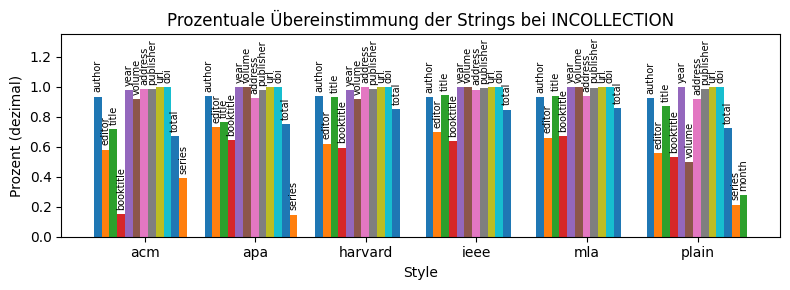

In [46]:
# Einschränkung auf einen Typ und Generierung des gruppierten Balkendiagramms
type = 'incollection'
df_filter2 = df_filter.loc[df_filter["Literaturtyp"] == type].reset_index(drop=True)

df_filter2 = df_filter2.drop([
    'Literaturtyp','AnteilKorrekterAutoren', 'AnteilGleicherNachnamen', 'AnteilÜbrigerAutoren',
    'AnteilKorrekterEditoren','AnteilGleicherNachnamenEditoren','AnteilÜbrigerEditoren'
    ,'journal', 'pages', 'number', 'edition','school'
    ], axis=1)
display(df_filter2)

species = tuple(df_filter2['Style'])
penguin_means = {
    'author': tuple(df_filter2['author']),
    'editor': tuple(df_filter2['editor']),
    'title': tuple(df_filter2['title']),
    'booktitle': tuple(df_filter2['booktitle']),
    'year': tuple(df_filter2['year']),
    'volume': tuple(df_filter2['volume']),
    'address': tuple(df_filter2['address']),
    'publisher': tuple(df_filter2['publisher']),
    'url': tuple(df_filter2['url']),
    'doi': tuple(df_filter2['doi']),
    'total': tuple(df_filter2['total_fields']),
    'series': tuple(df_filter2['series']),
    'month': tuple(df_filter2['month'])
}

x = np.arange(len(species))  # the label locations
width = 0.07  # the width of the bars
n = len(penguin_means)  # Anzahl der Attribute
total_width = width * n  # Gesamtbreite aller Bars für einen x-Wert
offset_start = -total_width / 2  # Anfangsoffset, um die Bars zu zentrieren

fig, ax = plt.subplots(figsize=(8, 3), layout='constrained')

for i, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = offset_start + 0.1 + i * width
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, labels=[attribute] * len(rects), padding=3, rotation=90, fontsize=7)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prozent (dezimal)')
ax.set_xlabel('Style')
ax.set_title('Prozentuale Übereinstimmung der Strings bei INCOLLECTION')
ax.set_xticks(x + width, species)
#ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.35)

# Layout anpassen, um abgeschnittene Teile zu vermeiden
plt.tight_layout()
plt.savefig('incollection.png')
plt.show()

,Style,total_fields,title,series,year,volume,address,publisher,edition,author,editor
0,acm,0.859,0.793,0.267,1.0,1.0,0.959,0.964,0.333,0.830,0.890
1,apa,0.830,0.789,0.078,1.0,1.0,0.865,0.947,0.333,0.878,0.871
2,harvard,0.874,0.848,0.109,1.0,1.0,0.963,0.965,0.333,0.863,0.950
3,ieee,0.834,0.725,NaN,1.0,1.0,0.977,0.965,0.333,0.830,0.949
4,mla,0.872,0.828,0.885,1.0,1.0,0.958,0.963,0.333,0.861,0.939
5,plain,0.886,0.858,0.144,1.0,1.0,0.954,0.957,NaN,0.851,0.778


C:\Users\David\AppData\Local\Temp\ipykernel_12004\3650918827.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


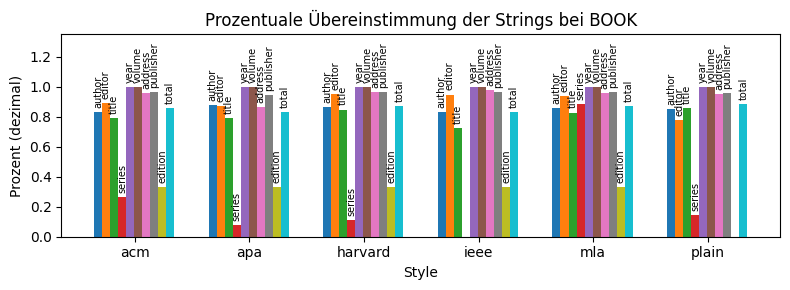

In [50]:
# Einschränkung auf einen Typ und Generierung des gruppierten Balkendiagramms
type = 'book'
df_filter2 = df_filter.loc[df_filter["Literaturtyp"] == type].reset_index(drop=True)

df_filter2 = df_filter2.drop([
    'Literaturtyp','AnteilKorrekterAutoren', 'AnteilGleicherNachnamen', 'AnteilÜbrigerAutoren',
    'AnteilKorrekterEditoren','AnteilGleicherNachnamenEditoren','AnteilÜbrigerEditoren'
    ,'journal', 'pages', 'number', 'booktitle','school', 'url', 'doi', 'month'
    ], axis=1)
display(df_filter2)

species = tuple(df_filter2['Style'])
penguin_means = {
    'author': tuple(df_filter2['author']),
    'editor': tuple(df_filter2['editor']),
    'title': tuple(df_filter2['title']),
    'series': tuple(df_filter2['series']),
    'year': tuple(df_filter2['year']),
    'volume': tuple(df_filter2['volume']),
    'address': tuple(df_filter2['address']),
    'publisher': tuple(df_filter2['publisher']),
    'edition': tuple(df_filter2['edition']),
    'total': tuple(df_filter2['total_fields'])
}

x = np.arange(len(species))  # the label locations
width = 0.07  # the width of the bars
n = len(penguin_means)  # Anzahl der Attribute
total_width = width * n  # Gesamtbreite aller Bars für einen x-Wert
offset_start = -total_width / 2  # Anfangsoffset, um die Bars zu zentrieren

fig, ax = plt.subplots(figsize=(8, 3), layout='constrained')

for i, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = offset_start + 0.1 + i * width
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, labels=[attribute] * len(rects), padding=3, rotation=90, fontsize=7)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prozent (dezimal)')
ax.set_xlabel('Style')
ax.set_title('Prozentuale Übereinstimmung der Strings bei BOOK')
ax.set_xticks(x + width, species)
#ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.35)

# Layout anpassen, um abgeschnittene Teile zu vermeiden
plt.tight_layout()
plt.savefig('book.png')
plt.show()

,Style,total_fields,title,year,month,address,school,author,editor
0,acm,0.583,0.502,1.0,1.0,0.869,0.989,0.85,0.99
1,apa,0.722,0.701,1.0,NaN,0.766,0.808,1.00,0.99
2,harvard,0.676,0.642,1.0,NaN,0.844,0.976,1.00,0.98
3,ieee,0.960,0.958,1.0,1.0,0.840,0.980,1.00,1.00
4,mla,0.885,0.868,1.0,1.0,0.903,0.986,0.99,0.99
5,plain,0.919,0.909,1.0,1.0,0.848,0.963,0.95,1.00


C:\Users\David\AppData\Local\Temp\ipykernel_12004\4108810648.py:46: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


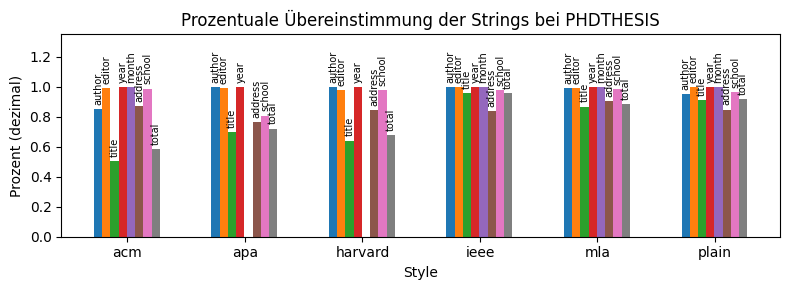

In [54]:
# Einschränkung auf einen Typ und Generierung des gruppierten Balkendiagramms
type = 'phdthesis'
df_filter2 = df_filter.loc[df_filter["Literaturtyp"] == type].reset_index(drop=True)

df_filter2 = df_filter2.drop([
    'Literaturtyp','AnteilKorrekterAutoren', 'AnteilGleicherNachnamen', 'AnteilÜbrigerAutoren',
    'AnteilKorrekterEditoren','AnteilGleicherNachnamenEditoren','AnteilÜbrigerEditoren'
    ,'journal', 'volume', 'pages', 'number', 'booktitle','publisher', 'url', 'doi', 'edition', 'series'
    ], axis=1)
display(df_filter2)

species = tuple(df_filter2['Style'])
penguin_means = {
    'author': tuple(df_filter2['author']),
    'editor': tuple(df_filter2['editor']),
    'title': tuple(df_filter2['title']),
    'year': tuple(df_filter2['year']),
    'month': tuple(df_filter2['month']),
    'address': tuple(df_filter2['address']),
    'school': tuple(df_filter2['school']),
    'total': tuple(df_filter2['total_fields'])
}

x = np.arange(len(species))  # the label locations
width = 0.07  # the width of the bars
n = len(penguin_means)  # Anzahl der Attribute
total_width = width * n  # Gesamtbreite aller Bars für einen x-Wert
offset_start = -total_width / 2  # Anfangsoffset, um die Bars zu zentrieren

fig, ax = plt.subplots(figsize=(8, 3), layout='constrained')

for i, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = offset_start + 0.1 + i * width
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, labels=[attribute] * len(rects), padding=3, rotation=90, fontsize=7)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prozent (dezimal)')
ax.set_xlabel('Style')
ax.set_title('Prozentuale Übereinstimmung der Strings bei PHDTHESIS')
ax.set_xticks(x + width, species)
#ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.35)

# Layout anpassen, um abgeschnittene Teile zu vermeiden
plt.tight_layout()
plt.savefig('phdthesis.png')
plt.show()